In [11]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [12]:
# 读取数据
data = pd.read_csv('./Terrain_Test/data/csv_file/features.csv')
len(data)

6805

In [13]:
# 删除缺失值
# 删除有缺失值的行
data.dropna(inplace=True)
len(data)

6805

In [14]:
data.columns

Index(['Unnamed: 0', 'OID_', 'SY_POINT_GD', 'X', 'Y', 'SY_ASP_5_Band_1',
       'SY_CUR_5_Band_1', 'SY_DEM_5_Band_1', 'SY_DLTB_RASTER_Band_1',
       'SY_DZ_5_Band_1', 'SY_NDVI_5_Band_1', 'SY_NIGTH_5_Band_1', 'PH',
       'SY_PLCUR_5_Band_1', 'SY_POCUR_5_Band_1', 'SY_PRE_5_Band_1',
       'SY_SLOP_5_Band_1', 'SY_SOILQS_5_Band_1', 'SY_TMP_5_Band_1',
       'SY_TPI_101_Band_1', 'SY_TPI_11_Band_1', 'SY_TPI_201_Band_1',
       'SY_TPI_3_Band_1', 'SY_TWI_5_Band_1'],
      dtype='object')

In [15]:
data.drop(['Unnamed: 0','OID_','SY_POINT_GD'], axis=1, inplace=True)
data.columns

Index(['X', 'Y', 'SY_ASP_5_Band_1', 'SY_CUR_5_Band_1', 'SY_DEM_5_Band_1',
       'SY_DLTB_RASTER_Band_1', 'SY_DZ_5_Band_1', 'SY_NDVI_5_Band_1',
       'SY_NIGTH_5_Band_1', 'PH', 'SY_PLCUR_5_Band_1', 'SY_POCUR_5_Band_1',
       'SY_PRE_5_Band_1', 'SY_SLOP_5_Band_1', 'SY_SOILQS_5_Band_1',
       'SY_TMP_5_Band_1', 'SY_TPI_101_Band_1', 'SY_TPI_11_Band_1',
       'SY_TPI_201_Band_1', 'SY_TPI_3_Band_1', 'SY_TWI_5_Band_1'],
      dtype='object')

In [16]:
# 重命名列名称
new_colums = {"SY_ASP_5_Band_1":"ASP","SY_CUR_5_Band_1":"CUR","SY_DEM_5_Band_1":"DEM","SY_DLTB_RASTER_Band_1":"DL","SY_DZ_5_Band_1":"DZ","SY_NDVI_5_Band_1":"NDVI","SY_NIGTH_5_Band_1":"NIGHT","SY_PLCUR_5_Band_1":"PLCUR","SY_POCUR_5_Band_1":"POCUR","SY_PRE_5_Band_1":"PRE","SY_SLOP_5_Band_1":"SLOPE",
              "SY_SOILQS_5_Band_1":"SOILQS","SY_TMP_5_Band_1":"TMP","SY_TPI_101_Band_1":"TPI101","SY_TPI_11_Band_1":"TPI11","SY_TPI_201_Band_1":"TPI201","SY_TPI_3_Band_1":"TPI3","SY_TWI_5_Band_1":"TWI5"}
data.rename(columns=new_colums,inplace=True)
data.columns

Index(['X', 'Y', 'ASP', 'CUR', 'DEM', 'DL', 'DZ', 'NDVI', 'NIGHT', 'PH',
       'PLCUR', 'POCUR', 'PRE', 'SLOPE', 'SOILQS', 'TMP', 'TPI101', 'TPI11',
       'TPI201', 'TPI3', 'TWI5'],
      dtype='object')

In [17]:
# 划分测试数据
train_data = data.sample(frac=0.7,random_state=0)   # 80%的数据用于训练
test_data = data.drop(train_data.index)                 # 20%的数据用于测试
train_data.sample()

,X,Y,ASP,CUR,DEM,DL,DZ,NDVI,NIGHT,PH,...,POCUR,PRE,SLOPE,SOILQS,TMP,TPI101,TPI11,TPI201,TPI3,TWI5
4218,433025.5291,3117473.974,57.200314,5.200195,965.700012,7,2.0,173.0,0.34,5.13,...,-6.240107,835.083313,21.876036,13,158.25,17.118713,0.475891,64.67456,0.100647,5.691724


In [18]:
label = 'PH'
train_data[label].describe()

count    4764.000000
mean        5.913144
std         0.935529
min         4.140000
25%         5.210000
50%         5.710000
75%         6.432500
max         8.460000
Name: PH, dtype: float64

In [19]:
# TabularPredictor.load("AutogluonModels\ag-20230802_083815\")  全要素

predictor = TabularPredictor(label=label).fit(train_data,time_limit=600)


No path specified. Models will be saved in: "AutogluonModels\ag-20230802_083815\"
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230802_083815\"
AutoGluon Version:  0.8.2
Python Version:     3.9.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   620.27 GB / 808.56 GB (76.7%)
Train Data Rows:    4764
Train Data Columns: 20
Label Column: PH
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (8.46, 4.14, 5.91314, 0.93553)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:

In [20]:
# 测试数据集
y_test_pred = predictor.predict(test_data.drop(columns=[label]))

In [21]:
y_test_pred

0       6.406607
7       5.671715
19      5.746421
21      6.526831
24      6.018757
          ...   
6791    7.398377
6792    7.066376
6794    5.526442
6799    5.269555
6802    5.156894
Name: PH, Length: 2041, dtype: float32

In [22]:
# 训练数据集
y_train_pred = predictor.predict(train_data.drop(columns=[label]))
y_train = train_data[label]

In [23]:

y_test = test_data[label]

In [24]:
# 计算残差
residuals_test =y_train - y_train_pred
residuals_test

6746   -0.255654
3687    0.164680
5040    0.014021
2817   -0.302653
5877   -0.128211
          ...   
4698   -0.120488
5757    0.114749
1592   -0.141434
6579    0.320675
6550   -0.210583
Name: PH, Length: 4764, dtype: float64

In [32]:
# 高斯克里金
OK = OrdinaryKriging(train_data['X'], train_data['Y'], residuals_test, variogram_model='spherical')  # 高斯模型 linear:0.494,gaussian:0.492,exponential:0.497,spherical:0.50
kriging_predictions_test, _ = OK.execute('points', test_data['X'], test_data['Y'])
predictions_test = y_test_pred + kriging_predictions_test

# 计算R2
r2 = r2_score(y_test, predictions_test)
r2

0.5011840485391867

In [33]:
new_r2 = r2_score(y_test, y_test_pred)
new_r2

0.4919967520311026

In [153]:
# 重新计算预测值

def calc_predict_value(actual_value, predict_value):
    diff = np.abs(actual_value - predict_value)/actual_value
    modified_diff = np.where(diff <= 0.15, actual_value, predict_value)
    return modified_diff


In [204]:
t_pred = calc_predict_value(test_data[label],y_test_pred)
t_pred

array([4.78      , 5.46      , 6.67      , ..., 5.67761469, 6.55      ,
       7.03      ])

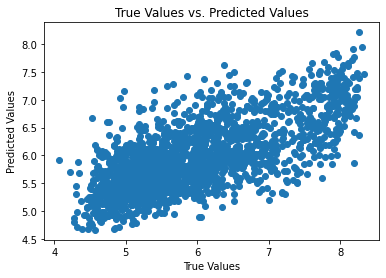

In [34]:
plt.scatter(y_test, predictions_test)

# 添加标签和标题
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')

# 显示图表
plt.show()

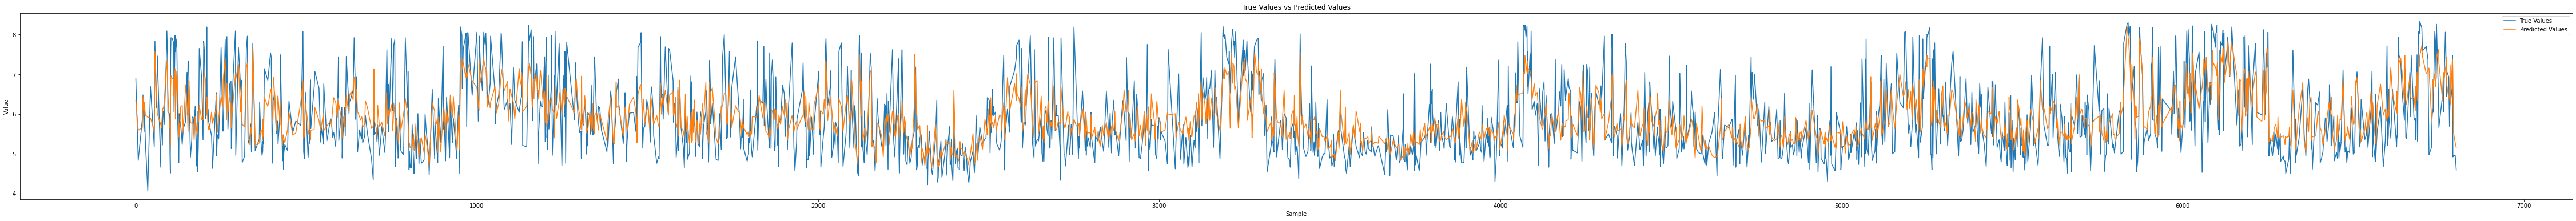

In [35]:
# 创建折线图
plt.figure(figsize=(80,6))
plt.plot(y_test, label='True Values')
plt.plot(predictions_test, label='Predicted Values')

# 图表标题和标签
plt.title('True Values vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')

# 添加图例
plt.legend()

# 显示图表
plt.show()

In [36]:
predictor.evaluate(test_data, silent=True)

{'root_mean_squared_error': -0.6883340435325883,
 'mean_squared_error': -0.47380375548592313,
 'mean_absolute_error': -0.5484531884891971,
 'r2': 0.4919967520311026,
 'pearsonr': 0.7077154720646127,
 'median_absolute_error': -0.463879871368408}

In [210]:

def calculate_modified_r2(y_true, y_pred):
    diff = np.abs(y_true - y_pred)/y_true
    modified_diff = np.where(diff <= 0.16, 0, np.abs(y_true - y_pred))
    modified_ssr = np.sum(modified_diff**2)
    
    mean = np.mean(y_true)
    total_diff = np.sum((y_true - mean)**2)
    
    r2 = 1 - (modified_ssr / total_diff)
    return r2

print(calculate_modified_r2(test_data[label], y_test_pred))

0.609439123514638


In [211]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-0.740984,-0.715480,0.004364,0.001683,0.278744,0.004364,0.001683,0.278744,1,True,4
1,CatBoost,-0.742429,-0.719959,0.007320,0.003921,0.853909,0.007320,0.003921,0.853909,1,True,6
2,XGBoost,-0.744168,-0.721155,0.008503,0.002826,0.369916,0.008503,0.002826,0.369916,1,True,9
3,WeightedEnsemble_L2,-0.745580,-0.704676,0.157524,0.105308,6.668760,0.002670,0.000307,0.142850,2,True,12
4,ExtraTreesMSE,-0.746194,-0.715443,0.111731,0.077044,0.453620,0.111731,0.077044,0.453620,1,True,7
5,LightGBMXT,-0.751865,-0.729285,0.009533,0.002803,2.066669,0.009533,0.002803,2.066669,1,True,3
6,RandomForestMSE,-0.752279,-0.726674,0.142602,0.078026,1.356102,0.142602,0.078026,1.356102,1,True,5
7,LightGBMLarge,-0.754259,-0.723016,0.005863,0.001856,0.744382,0.005863,0.001856,0.744382,1,True,11
8,NeuralNetFastAI,-0.791416,-0.752817,0.031447,0.010445,2.681727,0.031447,0.010445,2.681727,1,True,8
9,NeuralNetTorch,-0.814286,-0.745130,0.007905,0.004695,4.672598,0.007905,0.004695,4.672598,1,True,10
